# EMERGENCY - 911 CALLS [Data Analysis]

 ### Emergency - 911 Dataset  
In this project, we'll analyze Emergency - 911 calls data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).  

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce   .
 The data contains the following fields:  


* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


**Business Objective:**  Improving Emergency Response Efficiency and Resource Allocation for 911 Calls 


**Objective Statement**  
The primary objective is to enhance the efficiency and effectiveness of emergency response services in Montgomery County by analyzing the 911 call data.  
This analysis aims to identify patterns and trends in emergency calls to optimize resource allocation, reduce response times, and improve overall emergency management.

1. a. Top 5 Zipcodes for 911 Calls  
   b. Top 5 townships (twp) for 911 calls  
   c. Examine the 'title' column, to see how many unique title codes are present?  
   d. Extract and classify the reasons for emergency calls from the "title" column     
      Using the .apply() method with a custom lambda expression to create a new column called "Reason" that captures the emergency type (EMS, Fire, Traffic)

1. What are the most common types of 911 calls?

2. How do the number of 911 calls vary over time?
    
3. During which hours of the day are 911 calls most frequent?
    
4. Which days of the week see the highest volume of 911 calls?
    
5. How is the geographical distribution of 911 calls?

6. Are there any seasonal patterns in 911 call volumes?
    
7. How do the types of calls vary by time of day and day of the week?
    
8. What are the key insights derived from the data?

### Importing Libraries  
First, we import the necessary libraries:  

* numpy and pandas are used for data manipulation and analysis
* matplotlib.pyplot and seaborn are used for data visualization
* %matplotlib inline is a magic function in Jupyter notebooks to display plots inline

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Data  
The data is read from a CSV file into a pandas DataFrame:

In [8]:
df = pd.read_csv('911.csv')
df.head() 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Data Overview

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Basic Analysis

**Top 5 Zipcodes for 911 Calls:**

In [10]:
t5_zipcode = df['zip'].value_counts().head(5)
t5_zipcode

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

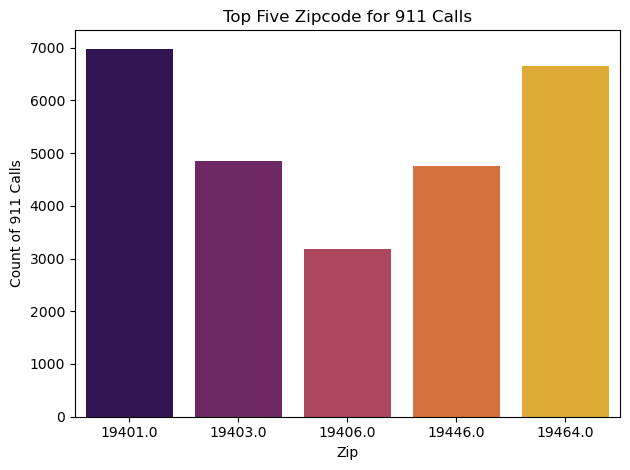

In [11]:
sns.barplot(x=t5_zipcode.index, y=t5_zipcode.values, palette='inferno')
plt.title('Top Five Zipcode for 911 Calls')
plt.xlabel('Zip')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

**Top 5 townships (twp) for 911 calls:**

In [12]:
t5_township = df['twp'].value_counts().head(5)
t5_township

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

Text(0.5, 23.52222222222222, 'Township')

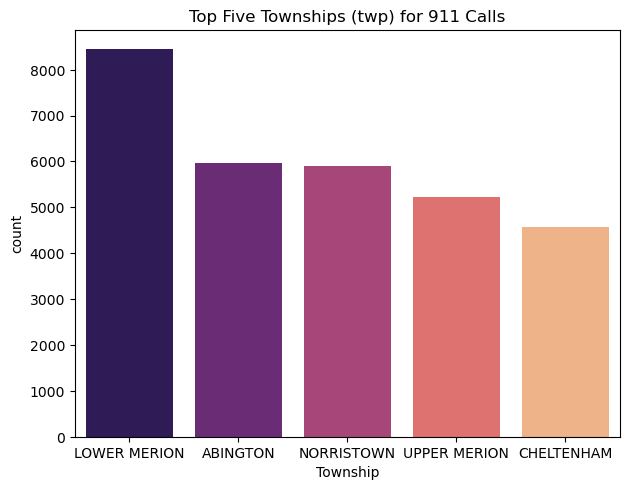

In [13]:
sns.countplot(x='twp',data=df,order=t5_township.index, palette='magma')
plt.tight_layout()
plt.title('Top Five Townships (twp) for 911 Calls')
plt.xlabel('Township')

**Examining the 'title' column, to see how many unique title codes are present?**

In [14]:
df['title'].nunique()

110

**Extracting and classifying the reasons for emergency calls from the "title" column. Using the .apply() method with a custom lambda expression to create a new column called "Reason" that captures the emergency type (EMS, Fire, Traffic).  
For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value should be EMS.**

In [15]:
x = df['title'].iloc[0] 

In [16]:
x.split(':')[0]

'EMS'

In [17]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [18]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

**Identifying the primary reason for 911 calls according to the categorized 'Reason' column.**

In [19]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**Using seaborn to create a countplot of 911 calls by 'Reason'.**

<Axes: xlabel='Reason', ylabel='count'>

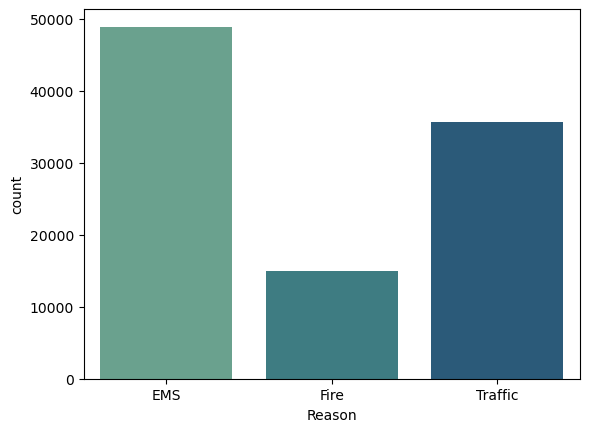

In [20]:
sns.countplot(x='Reason',data = df, palette = 'crest')

**What is the data type of the objects in the timeStamp column?**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   Reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [22]:
type(df['timeStamp'].iloc[0])

str

**Note that the timestamps are currently strings. We'll use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [23]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [24]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them.  
For example:**

In [25]:
time = df['timeStamp'].iloc[0]  
time.hour

17

**Now that the timestamp column are actually DateTime objects, we'll use .apply() to create 3 new columns called Hour, Month, and Day of Week. We will create these columns based off of the timeStamp column.**

In [26]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [27]:
time.day_of_week

3

In [28]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.day_of_week)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**_Notice how the Day of Week is an integer 0-6. We'll use the .map() with this dictionary to map the actual string names to the day of the week:_**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [30]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [31]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [32]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


**We'll use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

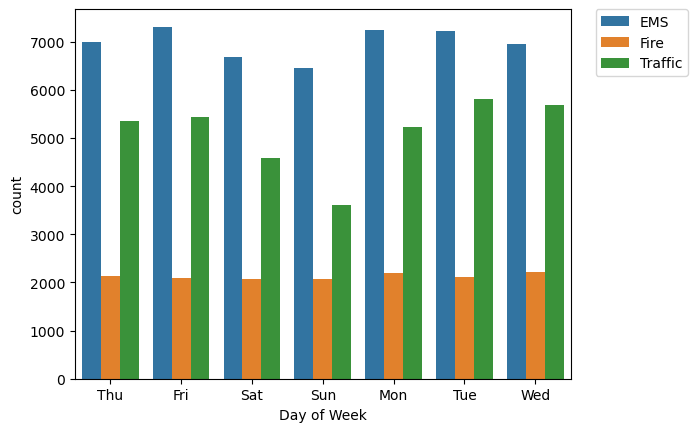

In [33]:
sns.countplot(x='Day of Week', data = df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Relocatiing legend

<Axes: xlabel='Hour', ylabel='count'>

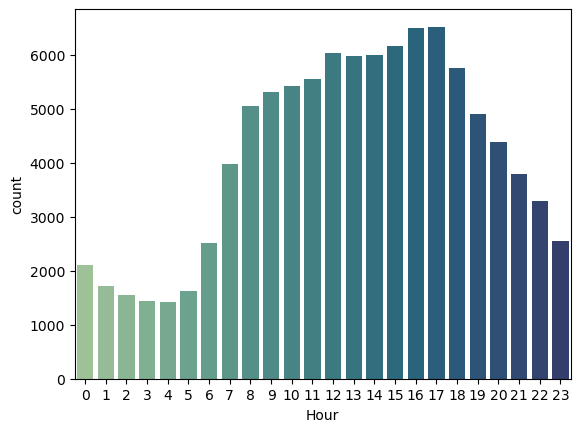

In [34]:
sns.countplot(x='Hour',data=df, palette='crest')

**Month:**

<Axes: xlabel='Month', ylabel='count'>

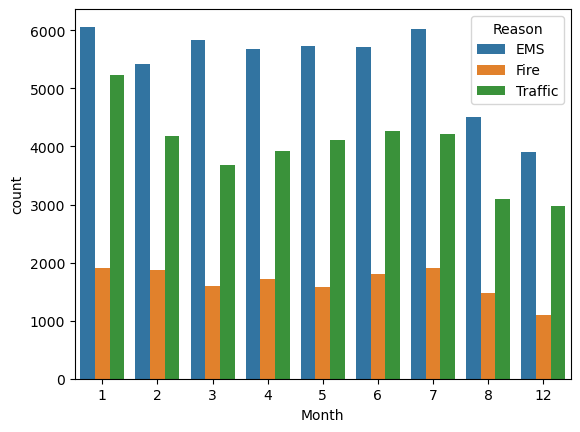

In [35]:
sns.countplot(x='Month', data = df, hue='Reason')

**Did you notice something strange about the Plot?**  
_You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas_

**We'll create a groupby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation. we'll use the head() method on this returned DataFrame.**

In [36]:
byMonth = df.groupby('Month').count()

In [37]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


_The count of calls per month._

<Axes: xlabel='Month'>

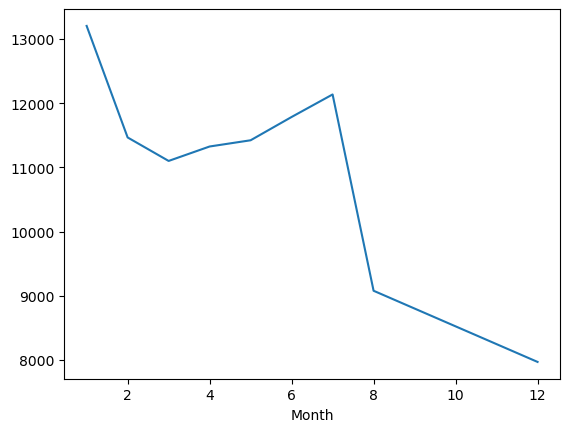

In [38]:
byMonth['lat'].plot()

<Axes: xlabel='Month', ylabel='count'>

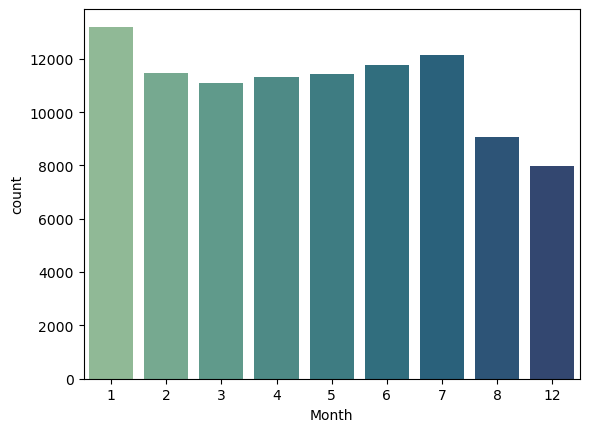

In [39]:
sns.countplot(x='Month', data = df, palette='crest')

**Now we'lluse seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind we might need to reset the index to a column.**

In [40]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


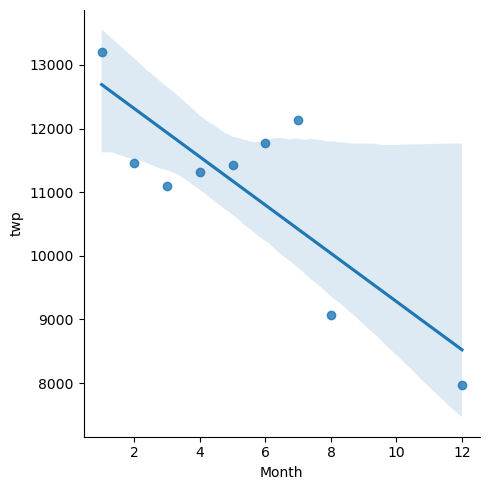

In [41]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column. We'll use .apply () along with the .date() method.** 

In [42]:
t = df['timeStamp'].iloc[0]

In [43]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Using groupby on the Date column with the count() aggregate and create a plot of counts of 911 calls.**

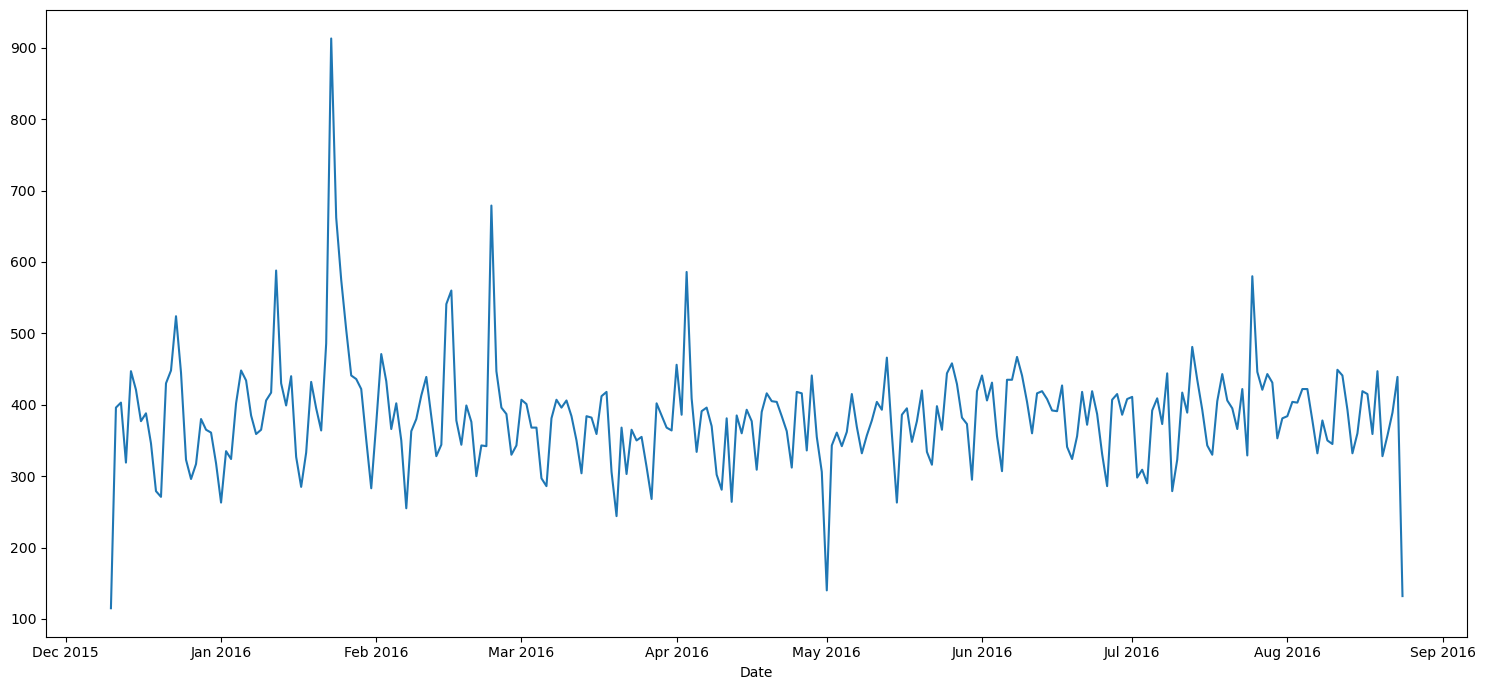

In [45]:
import matplotlib.dates as mdates
fig, axis = plt.subplots(figsize=(15,7))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
df.groupby('Date').count()['lat'].plot()

plt.tight_layout()

**Creating three separate plots with each plot representing a Reason for the 911 call**

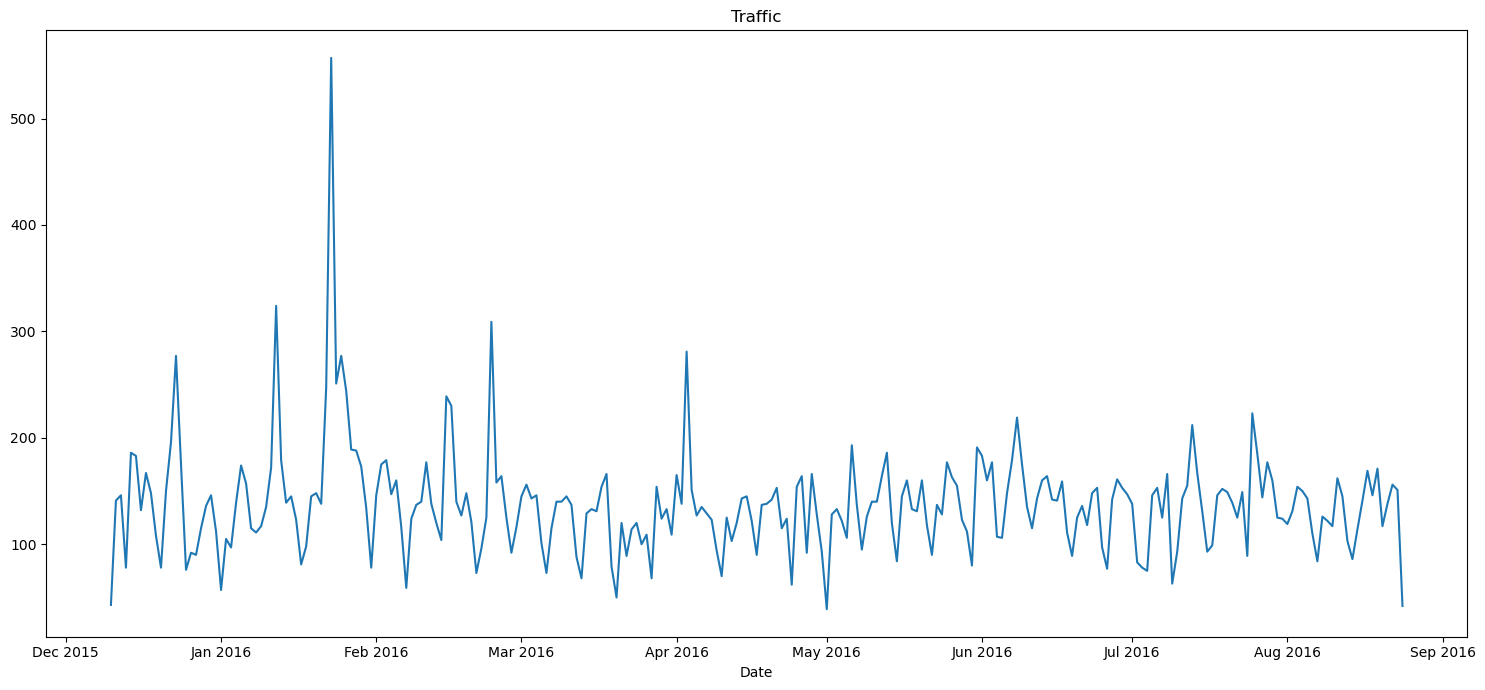

In [46]:
fig, axis = plt.subplots(figsize=(15,7))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

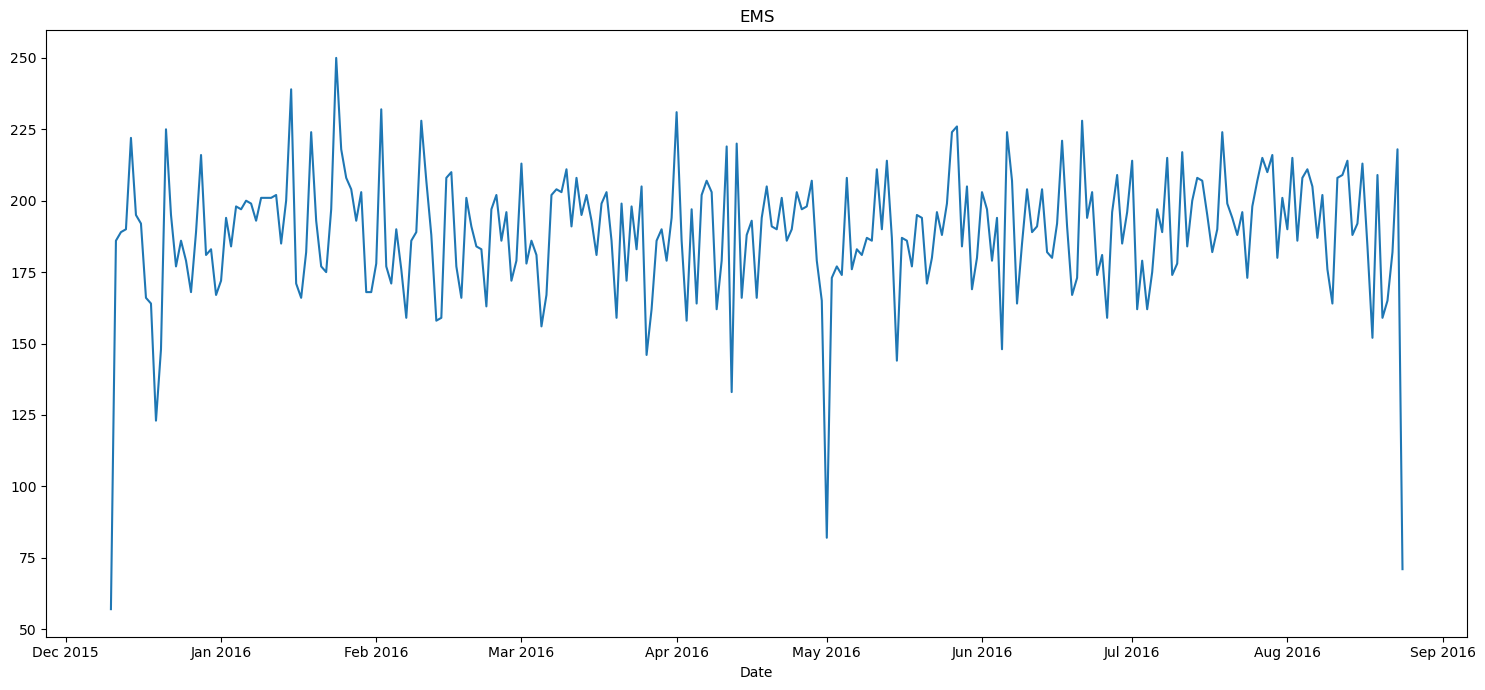

In [47]:
fig, axis = plt.subplots(figsize=(15,7))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

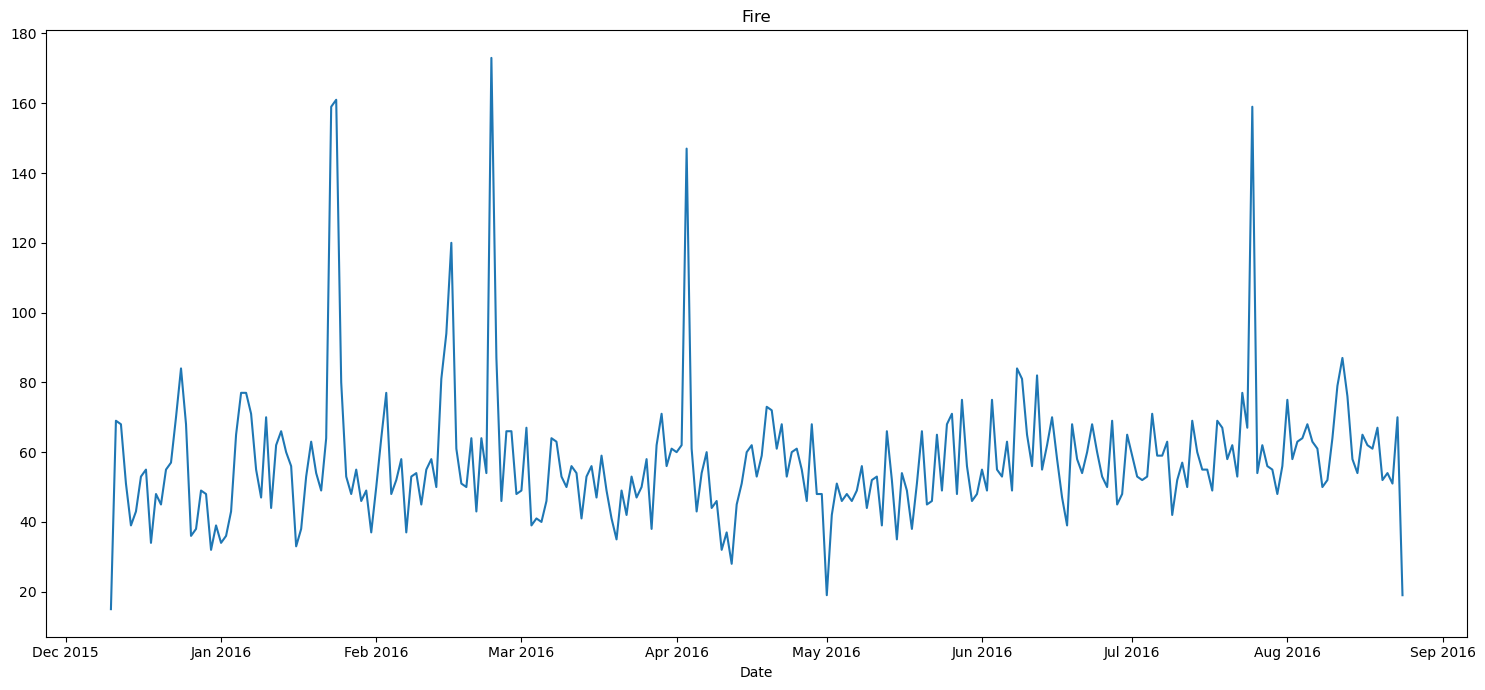

In [48]:
fig, axis = plt.subplots(figsize=(15,7))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()


**We'll create heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. We'll combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [49]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

**A HeatMap using this new DataFrame.**

<Figure size 1500x600 with 0 Axes>

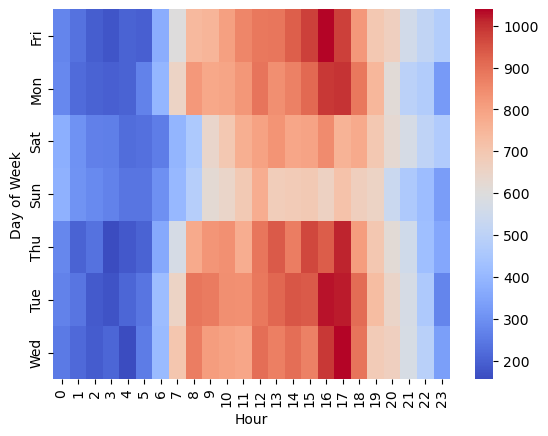

<Figure size 1500x600 with 0 Axes>

In [50]:
sns.heatmap(dayHour, cmap='coolwarm')
plt.figure(figsize=(15,6))

**A clustermap using this DataFrame.**

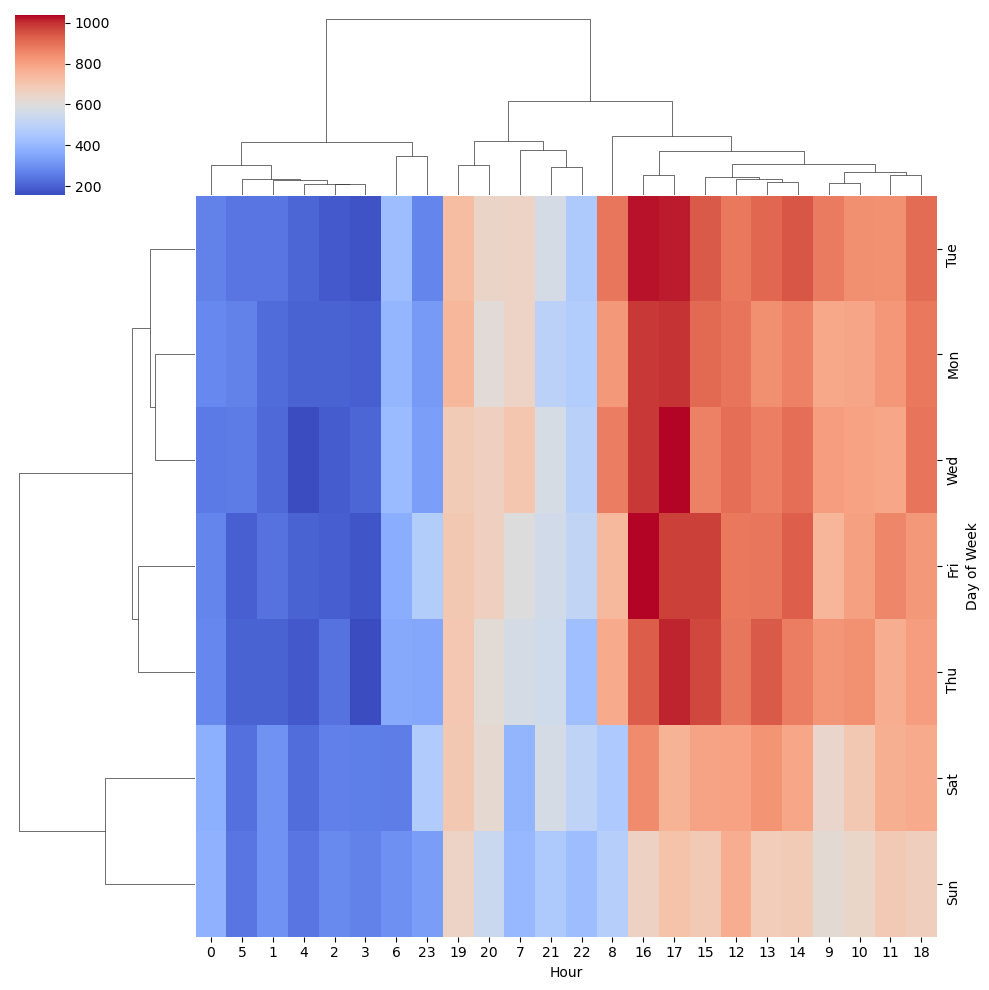

In [51]:
sns.clustermap(dayHour, cmap = 'coolwarm')

**Same plots and operations for a DataFrame that shows the Month as the column.**

In [52]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Figure size 1500x600 with 0 Axes>

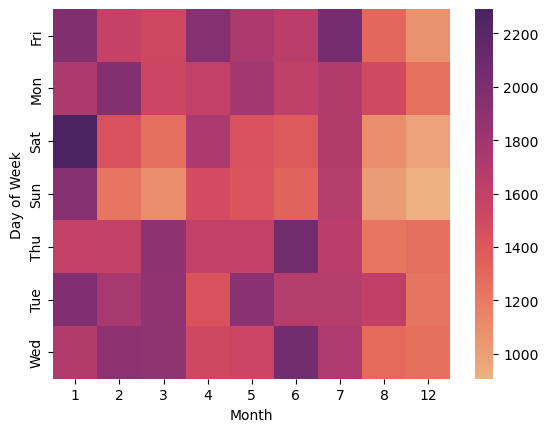

<Figure size 1500x600 with 0 Axes>

In [53]:
sns.heatmap(dayMonth, cmap='flare')
plt.figure(figsize=(15,6))

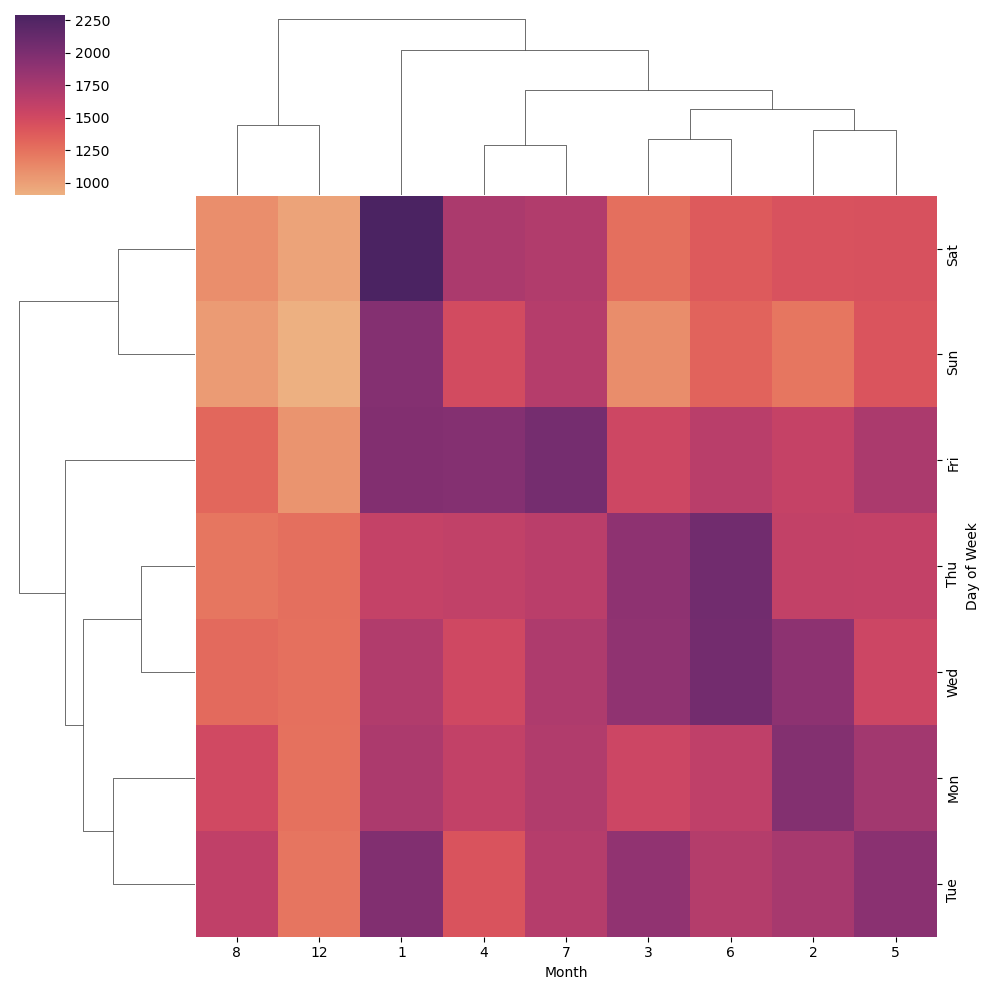

In [54]:
sns.clustermap(dayMonth, cmap = 'flare')

### Overall Insights:

Temporal Trends:  
There are clear temporal patterns in the data, such as peak hours for calls and specific days or months with higher call volumes.

Spatial Distribution:  
Certain zip codes and townships have higher frequencies of emergency calls, which could be due to higher population density, socioeconomic factors, or local issues.

Type of Emergencies:  
EMS-related calls are the most frequent, indicating a significant need for medical emergency services.

Resource Allocation:  
Understanding these patterns can help emergency services allocate resources more effectively, plan for peak times, and address specific community needs.  

These insights can help in improving the efficiency and effectiveness of emergency response services by focusing on areas and times with higher demand and understanding the nature of emergencies better.


###### Rekai.Inc